In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # KNNClassifier Model from sklearn
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
tit_datsset = pd.read_csv("Titanic-Dataset.csv")
tit_datsset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
tit_datsset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
age_median = tit_datsset['Age'].median()
print("age median->", age_median)
tit_datsset['Age'].fillna(age_median, inplace= True)
tit_datsset.info()

age median-> 28.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_8620\3911846501.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tit_datsset['Age'].fillna(age_median, inplace= True)


In [18]:
wmbrked_mde = tit_datsset['Embarked'].mode()
print("Embarked Mode --> ",wmbrked_mde[0])
tit_datsset['Embarked'].fillna(wmbrked_mde[0], inplace= True)
tit_datsset.info()

Embarked Mode -->  S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_8620\1994003470.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tit_datsset['Embarked'].fillna(wmbrked_mde[0], inplace= True)


In [19]:
map_gender_catg_num_val = {'male':0, 'female' : 1}
print(map_gender_catg_num_val)
print(tit_datsset.head())
print("map_gender_catg_num_val --> ",map_gender_catg_num_val)
tit_datsset['Sex'] = tit_datsset['Sex'].map(map_gender_catg_num_val)
print(tit_datsset.head())

{'male': 0, 'female': 1}
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

In [20]:
tit_datsset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [21]:
map_embarked_catg_num_val = {'C':0, 'Q' : 1,'S':2}
print(map_embarked_catg_num_val)
print(tit_datsset.head())
print("map_embarked_catg_num_val --> ",map_embarked_catg_num_val)
tit_datsset['Embarked'] = tit_datsset['Embarked'].map(map_embarked_catg_num_val)
print(tit_datsset.head())

{'C': 0, 'Q': 1, 'S': 2}
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN       

In [22]:
tit_datsset.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
print(tit_datsset.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    0  22.0      1      0   7.2500         2
1            2         1       1    1  38.0      1      0  71.2833         0
2            3         1       3    1  26.0      0      0   7.9250         2
3            4         1       1    1  35.0      1      0  53.1000         2
4            5         0       3    0  35.0      0      0   8.0500         2


In [23]:
X = tit_datsset.drop('Survived' , axis=1)
y = tit_datsset['Survived']

In [24]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [27]:
train_accuracy = []
test_accuracy = []

for neigbor_cnt in range(1,30):
    knn_classifier_accuracy_check = KNeighborsClassifier(n_neighbors=neigbor_cnt)
    knn_classifier_accuracy_check.fit(X_train,y_train)
    train_accuracy.append(knn_classifier_accuracy_check.score(X_train,y_train))
    test_accuracy.append(knn_classifier_accuracy_check.score(X_test,y_test))

print("train_accuracy : ",train_accuracy)  
print("test_accuracy : ",test_accuracy)  

train_accuracy :  [1.0, 0.8009630818619583, 0.7656500802568218, 0.7319422150882825, 0.7367576243980738, 0.709470304975923, 0.723916532905297, 0.709470304975923, 0.7046548956661316, 0.6869983948635634, 0.6821829855537721, 0.6821829855537721, 0.6821829855537721, 0.6773675762439807, 0.6741573033707865, 0.6725521669341894, 0.6709470304975923, 0.6613162118780096, 0.6709470304975923, 0.6532905296950241, 0.6677367576243981, 0.666131621187801, 0.680577849117175, 0.6773675762439807, 0.6789727126805778, 0.6629213483146067, 0.6629213483146067, 0.6645264847512039, 0.6693418940609952]
test_accuracy :  [0.6305970149253731, 0.6716417910447762, 0.6231343283582089, 0.6492537313432836, 0.6044776119402985, 0.6529850746268657, 0.6455223880597015, 0.664179104477612, 0.667910447761194, 0.6791044776119403, 0.6865671641791045, 0.6902985074626866, 0.6791044776119403, 0.6902985074626866, 0.6753731343283582, 0.6940298507462687, 0.6902985074626866, 0.6940298507462687, 0.6940298507462687, 0.6940298507462687, 0.697

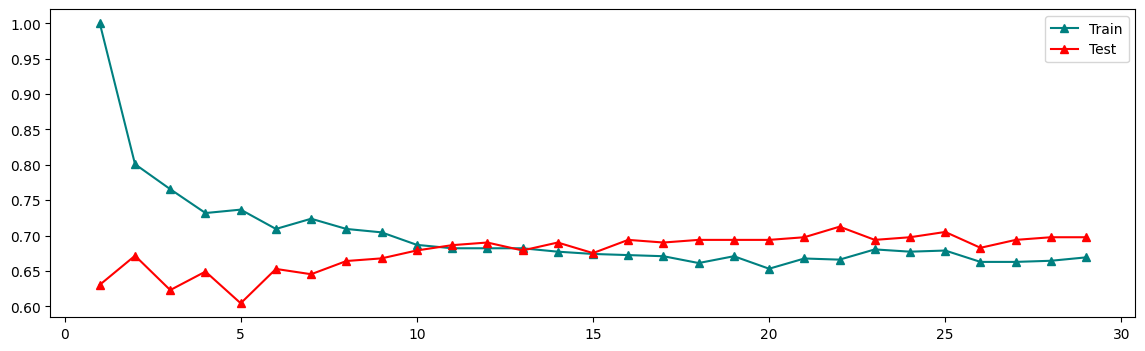

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(range(1,30), train_accuracy, marker="^",color = 'teal',label="Train")
plt.plot(range(1,30), test_accuracy,  marker="^",color = 'red', label="Test")
plt.legend()
plt.show()

In [ ]:
knn_classifier_mdl = KNeighborsClassifier(n_neighbors=10)
knn_classifier_mdl.fit(X_train,y_train)
print("Accuracy Score with KNN CLassifier with K=10 : ",knn_classifier_mdl.score(X_test,y_test))

ValueError: Found input variables with inconsistent numbers of samples: [623, 268]

range(1, 30)
